In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# 1. Dataset Representation

The dataset that we have chosen is `Dataset5` and as you can see from the code below, we will load the dataset into a DataFrame

In [2]:
# Generating the first 5 observations of the dataset

Dataset5_df = pd.read_csv("Dataset5.csv")
Dataset5_df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,class
0,0,185.444143,356.772827,247.214329,350.528606,53.522970,584.549744,97.173214,371.689430,701.090739,-299.062372,0
1,1,12.607185,424.229828,-30.161324,78.372181,531.996623,340.443160,-29.915956,316.879323,313.948814,539.694765,0
2,2,232.633486,178.888186,181.975058,512.254449,361.797323,-299.563635,206.748913,457.242606,-15.847660,229.352476,0
3,3,135.029109,28.148842,431.180447,-99.996098,0.168818,-46.235097,381.357999,622.660571,364.123468,402.671182,0
4,4,126.781295,225.034406,41.053820,588.804879,220.766392,216.064800,-29.566375,63.220223,215.753054,71.795168,0


The dataset provided above is a synthetic dataset. Therefore the description for each entries and columns were not provided. Looking into the structure and information of dataset would give us an idea on the possible entity for the dataset.

In [3]:
# Generating information regarding the dataset

Dataset5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  900 non-null    int64  
 1   f1          900 non-null    float64
 2   f2          900 non-null    float64
 3   f3          900 non-null    float64
 4   f4          900 non-null    float64
 5   f5          900 non-null    float64
 6   f6          900 non-null    float64
 7   f7          900 non-null    float64
 8   f8          900 non-null    float64
 9   f9          900 non-null    float64
 10  f10         900 non-null    float64
 11  class       900 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 84.5 KB


In [4]:
# Checking if there are any null values in any variables

Dataset5_df.isnull().any()

Unnamed: 0    False
f1            False
f2            False
f3            False
f4            False
f5            False
f6            False
f7            False
f8            False
f9            False
f10           False
class         False
dtype: bool

From the initial exploration, we can take note of the following:
- There are **900** observations in the DataFrame
- There are 12 variables namely:
    - Unamed: 0
    - f1
    - f2
    - f3
    - f4
    - f5
    - f6
    - f7
    - f8
    - f9
    - f10
    - class
- Every class (except for `Unamed: 0` and `class`) holds **float64** data, `Unamed: 0` and `class` holds **int64** data.
- There are no empty values in any observations

Because the dataset description is not provided, we will provide our own interpretation. 
In this case, let us assume that each observation holds a **song** and the 12 variables represent the following:
- **`Unamed: 0`**: The index of the song.
- **`f1`**: Overtone
- **`f2`**: Amplitude
- **`f3`**: Pitch
- **`f4`**: Timbre
- **`f5`**: Rhythm
- **`f6`**: Harmony
- **`f7`**: Melody
- **`f8`**: Tempo
- **`f9`**: Duration
- **`f10`**: Song Rating
- **`class`**: Genre
    - `0`: Classical
    - `1`: Instrumental
    - `2`: Pop


# 2. Exploratory Data Analysis

This section of the notebook tackles exploring the dataset further and focusing on the following interesting questions:
1. Which genre is the most popular in terms of their score rating?
2. Which genre has the highest average pitch?

Through the use of Numerical and Visual representations.

### Which genre is the most popular in terms of their average score rating?
In this section, we wanted to determine among the three song genres we have which one is the most popular based on their score rating.

In [5]:
# Generating the Summary Statistics for the Score Rating and Genre

rating_genre_summary_stat = Dataset5_df.groupby("class").agg({"f10": ["mean", "median", "std", len]})
rating_genre_summary_stat

f10                                
              mean       median         std    len
class                                             
0       220.920755   205.251662  267.912884  300.0
1       334.220221   329.437803  212.612147  300.0
2      1006.334688  1010.079468  200.598607  300.0

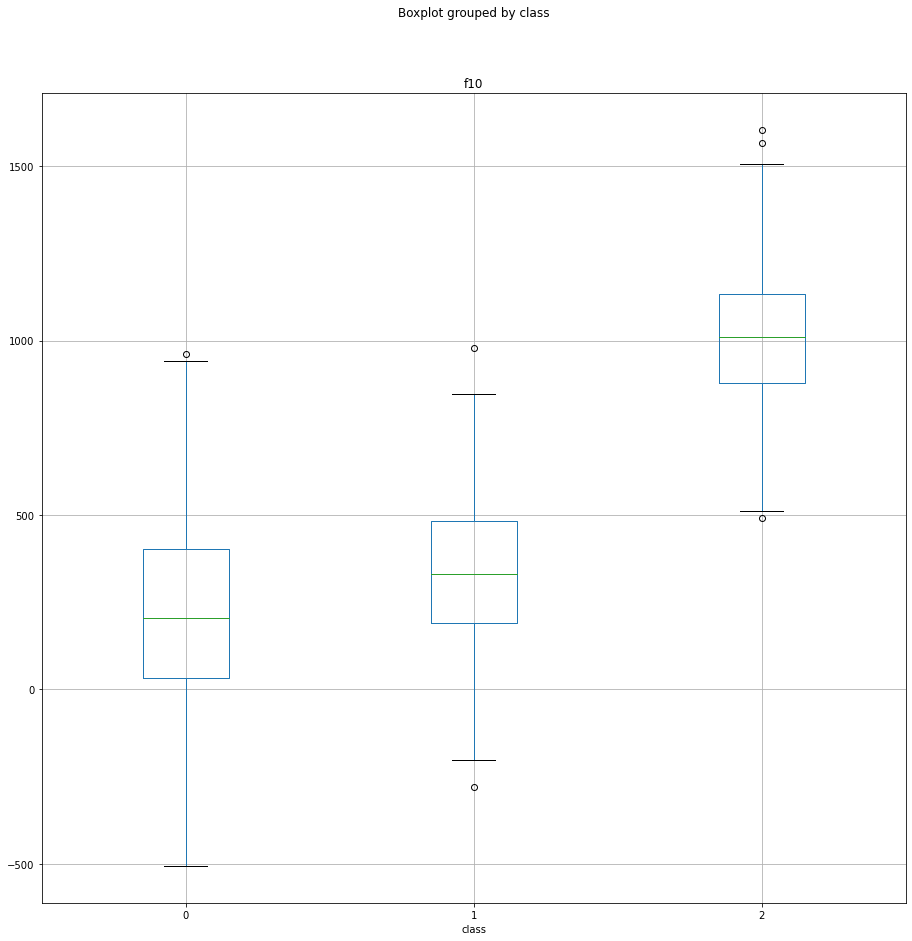

In [6]:
# Generating the Boxplot for the Score Rating and Genre

Dataset5_df.boxplot("f10", by="class", figsize=(15,15))
plt.show()

The boxplot shows us that the most popular genre among the three is the Pop Music followed by Instrumental Music and then Classical Music. Aside from being the most popular in terms of the song rating, Pop Music has also the lowest standard deviation among the three genres having about 200.60. Classical Music has the highest standard deviation having 267.91. This means song ratings for classical music are more spread out compared to other genres. This was also shown in the boxplot having the Classical Music with the longest range.

### Which genre has the highest average pitch?
In this section, we wanted to determine among the three song genres we have which one is the most popular based on their score rating.

In [7]:
# Generating the Summary Statistics for the Score Rating and Genre

pitch_genre_summary_stat = Dataset5_df.groupby("class").agg({"f3": ["mean", "median", "std", "max", "min", len]})
pitch_genre_summary_stat

f3                                                        
             mean      median         std          max         min    len
class                                                                    
0      221.769513  221.418582  259.030944  1003.593404 -461.132733  300.0
1      317.108935  315.321504  193.565049   919.440403 -161.037469  300.0
2      984.691123  982.918571  197.276971  1509.802773  426.686440  300.0

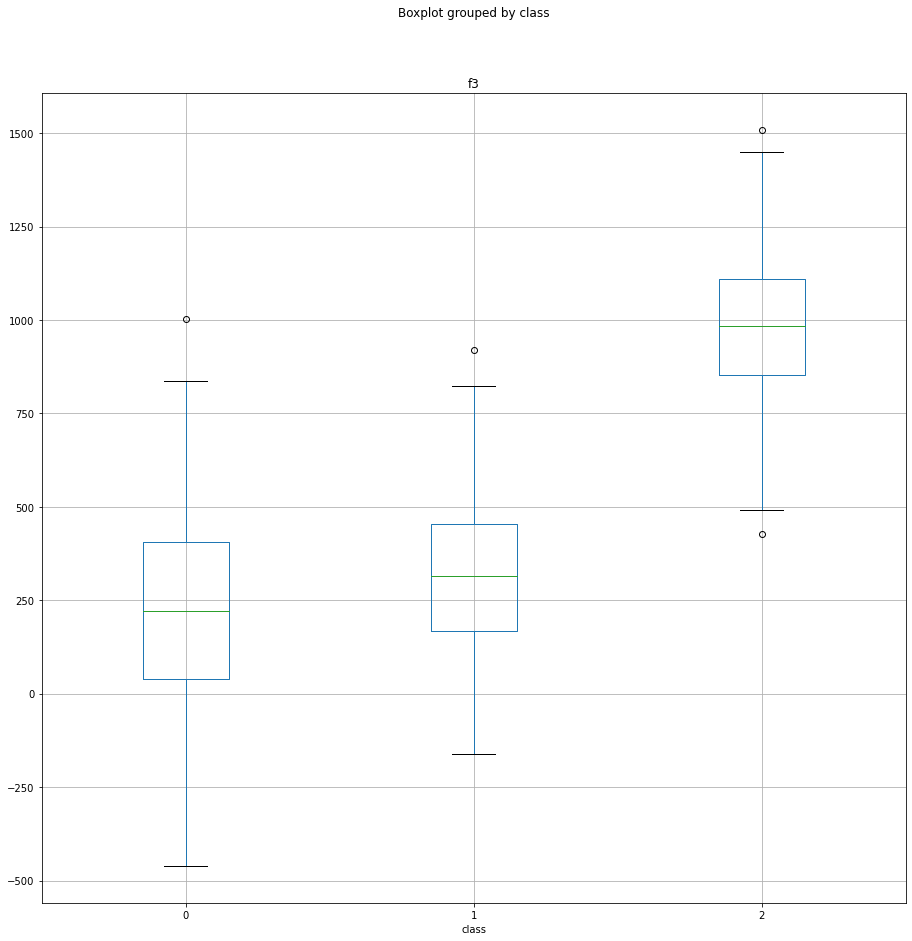

In [8]:
# Generating the Boxplot for the Score Rating and Genre

Dataset5_df.boxplot("f3", by="class", figsize=(15,15))
plt.show()

In terms of pitch, Pop music has the highest average pitch followed by Instrumental then Classical Music. Pop Music also has the highest pitch for a song about 1509.80 and it was reflected in the boxplot. Classical Music has the lowest pitch for a song with a record of -461.13. Moreover, the pitch for Classical Music are more disperesed or spread out compared to the other two genres as shown by the boxplot and backup by the std of about 259.03.

# 3. Data Mining

Through exploring the analysis, and the existance of the `class` variable, we know that this dataset requries the **clustering mining technique**. Given this, we shall use the `kmeans.py` file from one of the exercises. 

In [9]:
from kmeans import KMeans

In [10]:
Dataset5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  900 non-null    int64  
 1   f1          900 non-null    float64
 2   f2          900 non-null    float64
 3   f3          900 non-null    float64
 4   f4          900 non-null    float64
 5   f5          900 non-null    float64
 6   f6          900 non-null    float64
 7   f7          900 non-null    float64
 8   f8          900 non-null    float64
 9   f9          900 non-null    float64
 10  f10         900 non-null    float64
 11  class       900 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 84.5 KB


In [11]:
Dataset5_class0 = 0
Dataset5_class1 = 0
Dataset5_class2 = 0

for i in range(0, len(Dataset5_df)):
    if Dataset5_df['class'][i] == 0:
        Dataset5_class0 = Dataset5_class0 + 1
    if Dataset5_df['class'][i] == 1:
        Dataset5_class1= Dataset5_class1 + 1
    if Dataset5_df['class'][i] == 2:
        Dataset5_class2= Dataset5_class2 + 1
        
print("The number of observations for Classlical Music (Class 0) is:", Dataset5_class0)
print("The number of observations for Instrumental (Class 1) is:", Dataset5_class1)
print("The number of observations for Pop (Class 2) is:", Dataset5_class2)

The number of observations for Classlical Music (Class 0) is: 300
The number of observations for Instrumental (Class 1) is: 300
The number of observations for Pop (Class 2) is: 300


From the 900 observations, Class 0, Class 1, and Class 2 have split the observations evenly. We now instantiate `Kmeans` object where 
- `k` = **3** 
- `start_var` = **1**
- `end_var` = **11**
- `num_observations` = **900**
- `data` = **Dataset5_df**

In [12]:
Dataset5_kmeans = KMeans(3, 1, 11, 900, Dataset5_df)

After instantiating Kmeans, we now initialize the centriods.

In [13]:
Dataset5_kmeans.initialize_centroids(Dataset5_df)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,247.364914,596.723054,512.029165,236.858177,143.091590,363.358423,583.431848,-107.822335,-131.099161,281.268365
1,1228.142677,557.469119,714.513793,1008.924185,1185.730659,1618.269164,761.229029,1300.290799,1177.430062,1342.549791
2,203.439972,-310.798984,-89.285111,-278.684878,409.733236,207.834679,423.599498,935.108304,316.888205,-169.465882


Clustering the dataset.

In [14]:
clusters = Dataset5_kmeans.train(Dataset5_df, 300)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Done clustering!


After clustering, we check the number of classes per cluster.

In [15]:
cluster_0 = Dataset5_df.loc[clusters == 0]
cluster_1 = Dataset5_df.loc[clusters == 1]
cluster_2 = Dataset5_df.loc[clusters == 2]

print('Number of data points in each cluster:')
print('Cluster 0:')
print('Classlical Music (Class 0):\t', cluster_0.loc[cluster_0['class'] == 0].shape[0])
print('Instrumental (Class 1):\t\t', cluster_0.loc[cluster_0['class'] == 1].shape[0])
print('Pop (Class 2):\t\t\t', cluster_0.loc[cluster_0['class'] == 2].shape[0])
print("\n")
print('Cluster 1:')
print('Classlical Music (Class 0):\t', cluster_1.loc[cluster_1['class'] == 0].shape[0])
print('Instrumental (Class 1):\t\t', cluster_1.loc[cluster_1['class'] == 1].shape[0])
print('Pop (Class 2):\t\t\t', cluster_1.loc[cluster_1['class'] == 2].shape[0])
print("\n")
print('Cluster 2:')
print('Classlical Music (Class 0):\t', cluster_2.loc[cluster_2['class'] == 0].shape[0])
print('Instrumental (Class 1):\t\t', cluster_2.loc[cluster_2['class'] == 1].shape[0])
print('Pop (Class 2):\t\t\t', cluster_2.loc[cluster_2['class'] == 2].shape[0])

Number of data points in each cluster:
Cluster 0:
Classlical Music (Class 0):	 116
Instrumental (Class 1):		 242
Pop (Class 2):			 0


Cluster 1:
Classlical Music (Class 0):	 0
Instrumental (Class 1):		 0
Pop (Class 2):			 300


Cluster 2:
Classlical Music (Class 0):	 184
Instrumental (Class 1):		 58
Pop (Class 2):			 0


From the results above we can observe the following:
1. In `Cluster 0`, there are **116** and **242** data points from `Classlical Music (Class 0)` and `Class 1`, respectively.
    - `Instrumental (Class 1)` is the promiment class in `Cluster 0`.
2. In `Cluster 1`, there are **300** data points from `Pop (Class 2)`.
    - `Pop (Class 2)` is the promiment class in `Cluster 1`.
3. In `Cluster 2`, there are **184** and **58** data points from `Classlical Music (Class 0)` and `Instrumental (Class 1)`, respectively.
    - `Classlical Music (Class 0)` is the promiment class in `Cluster 2`.

# 4. Insights and Conclusions

The result of the data mining shows us that Pop Music (Class 2) is linearly separable from the other two genres while the Classical and Instrumental Music are not linearly separable in terms of the 10 variables namely: Overtone, Amplitude, Pitch, Timbre, Rhythm, Harmony, Melody, Tempo, Duration, and Score Rating.

Moreover, we know from the EDA that Pop Music is the most popular in terms of the score rating and it also has the highest average pitch. Aside from that, Pop Music also has the highest Overtone, Timbre, Rhythm, Harmony, Melody, Tempo, and Duration as we compare Cluster 1 to other Cluster.